In [1]:
import numpy as np
import os.path
import csv
import pandas
from sklearn import datasets
from sklearn import neighbors
from sklearn import tree
from math import isnan as isnan
from sklearn import preprocessing as pp
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pandas.read_csv('train.csv')
dfte = pandas.read_csv('test.csv')

In [128]:
df.isnull().sum() # checking null


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [127]:
df1 = df.fillna(df.mean()) #replacing blank ages with mean
# switching male-female sex to binary
AA = df1.ix[:,4:5].apply(LabelEncoder().fit_transform)
df2.ix[:,4:5] = AA

In [316]:
df2.ix[:,11:12] = df2.ix[:,11:12].fillna('S') #filling two bulls in embarked

In [317]:
df2.isnull().sum() # checking null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [320]:
df2.ix[:,11:12] = df2.ix[:,11:12].apply(LabelEncoder().fit_transform)
df2

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.000000      1   
2                               Heikkinen, Miss. Laina    0  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.000000      1   
4                             Allen, Mr. William Henry    1  35.000000      0   
5                                     Moran, Mr. James    1  29.699118      0   
6                              McCarthy, Mr. Timothy J    1  54.000000      0   
7                       Palsson, Master. Gosta Leonard    1   2.000000      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0  27.000000      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)    0  14.000000      1   
10                     Sandstrom, Miss. Marguerite Rut    0   4.000000      1   
11                            Bonnell, Miss. Elizabeth    0  58.000000      0   
12                      Saundercock, Mr. William Henry    1  20.000000      0   
13                         Andersson, Mr. Anders Johan    1  39.000000      1   
14                Vestrom, Miss. Hulda Amanda Adolfina    0  14.000000      0   
15                    Hewlett, Mrs. (Mary D Kingcome)     0  55.000000      0   
16                                Rice, Master. Eugene    1   2.000000      4   
17                        Williams, Mr. Charles Eugene    1  29.699118      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...    0  31.000000      1   
19                          

In [84]:
#pclass (maybe edit)
#age
#sibsp
#parch
#fare
#em


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
5                                     Moran, Mr. James    male  29.699118   
6                              McCarthy, Mr. Timothy J    male  54.000000   
7                       Palsson, Master. Gosta Leonard    male   2.000000   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.000000   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.000000   
10                     Sandstrom, Miss. Marguerite Rut  female   4.000000   
11                            Bonnell, Miss. Elizabeth  female  58.000000   
12                      Saundercock, Mr. William Henry    male  20.000000   
13                         Andersson, Mr. Anders Johan    male  39.000000   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.000000   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.000000   
16                                Rice, Master. Eugene    male   2.000000   
17                        Williams, Mr. Charles Eugene    male  29.699118   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.000000   
19                             Masselmani, Mrs. Fatima  female  29.699118   
20                             

In [85]:
np_train_data = df.as_matrix() #train_data
np_test_data = dfte.as_matrix() #train_data
np_tran_data_avgd = df1.as_matrix()

In [6]:
#age train
idx_list = [];
for i in range(0,len(np_train_data[:,5])):
    if not isnan(np_train_data[i,5]):
        idx_list = idx_list + [i]
age_np_train_data = np_train_data[idx_list]
age_prediction = age_np_train_data[:,1]
age_data = age_np_train_data[:,5]
fare_data = age_np_train_data[:,9]

In [7]:
#age train
idx_list = [];
for i in range(0,len(np_test_data[:,5])):
    if not isnan(np_test_data[i,4]):
        idx_list = idx_list + [i]
age_np_test_data = np_test_data[idx_list]
age_test_prediction = age_np_test_data[:,1]
age_test_data = age_np_test_data[:,4]
fare_test_data = age_np_test_data[:,8]

In [8]:
m = len([1,2,3])

In [9]:
def train_validate_test_split(arr, train_percent=.6, validate_percent=.3, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(range(len(arr)))
    m = len(arr)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = arr[perm[:train_end]]
    validate = arr[perm[train_end:validate_end]]
    test = arr[perm[validate_end:]]
    return train, validate, test

In [10]:
tr, va, te = train_validate_test_split(age_np_train_data)

In [11]:
len(va)

214

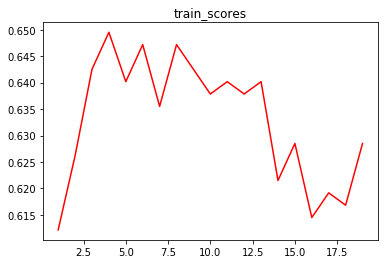

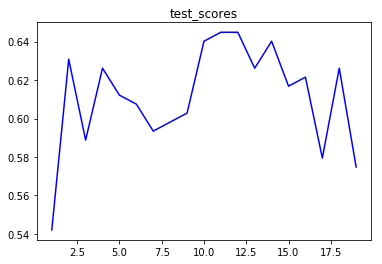

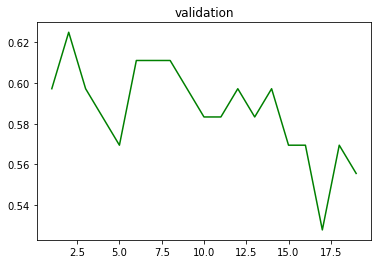

In [12]:
#knn try - best number of neighbors - 6
test_scores = []
train_scores = []
va_scores = []
for i in range(1,20):
    nei_num = i 
    weights = 'uniform'
    clf = neighbors.s(nei_num, weights=weights)
    C=tr[:,5].astype(float).reshape(-1,1)
    D = tr[:,1].astype(int)
    clf.fit(C,D)
    train_scores.append(clf.score(C,D))
    C1=va[:,5].astype(float).reshape(-1,1)
    D1=va[:,1].astype(int)
    test_scores.append(clf.score(C1,D1))
    C2=te[:,5].astype(float).reshape(-1,1)
    D2=te[:,1].astype(int)
    va_scores.append(clf.score(C2,D2))
x = [i for i in range(1,20)]
plt.figure()
plt.plot(x,train_scores,'red')
plt.title("train_scores")
plt.figure()
plt.plot(x,test_scores,'blue')
plt.title("test_scores")    
plt.figure()
plt.plot(x,va_scores,'green')
plt.title("validation")    

In [13]:
age_fare_tr=np.column_stack((tr[:,5].astype(float)/max(tr[:,5].astype(float)),tr[:,9].astype(float)/max(tr[:,9].astype(float))))
age_fare_va=np.column_stack((va[:,5].astype(float)/max(va[:,5].astype(float)),va[:,9].astype(float)/max(va[:,9].astype(float))))
len(D)

428

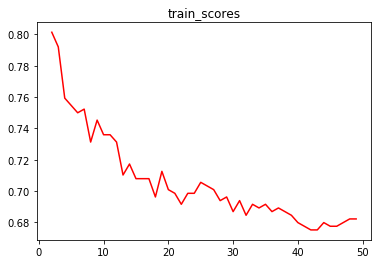

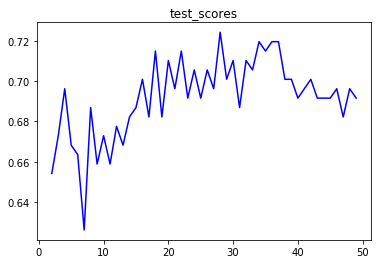

In [14]:
#knn try - best number of neighbors - 6
test_scores = []
train_scores = []
va_scores = []
for i in range(2,50):
    nei_num = i 
    weights = 'uniform'
    clf1 = neighbors.KNeighborsClassifier(nei_num, weights=weights)
    D = tr[:,1].astype(int)
    clf1.fit(age_fare_tr,D)
    train_scores.append(clf1.score(age_fare_tr,D))
    D1=va[:,1].astype(int)
    test_scores.append(clf1.score(age_fare_va,D1))
#    C2=te[:,5].astype(float).reshape(-1,1)
#    D2=te[:,1].astype(int)
#    va_scores.append(clf.score(C2,D2))
x = [i for i in range(2,50)]
plt.figure()
plt.plot(x,train_scores,'red')
plt.title("train_scores")
plt.figure()
plt.plot(x,test_scores,'blue')
plt.title("test_scores")    
#plt.figure()
#plt.plot(x,va_scores,'green')
#plt.title("validation")    

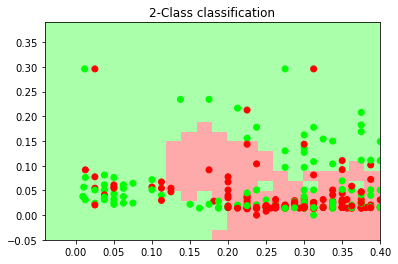

In [15]:
weights = 'distance'
clf = neighbors.KNeighborsClassifier(23, weights=weights)
D = tr[:,1].astype(int)
clf.fit(age_fare_tr,D)
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = age_fare_tr[:, 0].min() - 0.05, 0.4
y_min, y_max = age_fare_tr[:, 1].min() - 0.05, 0.4
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(age_fare_tr[:, 0], age_fare_tr[:, 1], c=tr[:,1].astype(int), cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification")

In [321]:
df2_mat = df2.as_matrix()

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1,
       2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2,
       1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0,
       2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2,
       0, 1,

In [327]:
tree_data = np.column_stack((df2_mat[:,-1],df2_mat[:,2].astype(int),df2_mat[:,4].astype(int),df2_mat[:,5].astype(float),df2_mat[:,6].astype(int),df2_mat[:,7].astype(int),df2_mat[:,9].astype(float),df2_mat[:,1].astype(int)))
f_names = ["Embarked","richness","sex","age","sibs","parents","fare"]
# df2_mat[:,1] survived
#df2_mat[;,2] richness
# df2_mat[:,4] sex
# df2_mat[:,5] age
# df2_mat[:,6] sibs
# df2_mat[:,7] parents
# df2_mat[:,9] fare
tree_data

array([[2, 3, 1, ..., 0, 7.25, 0],
       [0, 1, 0, ..., 0, 71.2833, 1],
       [2, 3, 0, ..., 0, 7.925, 1],
       ..., 
       [2, 3, 0, ..., 2, 23.45, 0],
       [0, 1, 1, ..., 0, 30.0, 1],
       [1, 3, 1, ..., 0, 7.75, 0]], dtype=object)

In [328]:
tr1, va1, te1 = train_validate_test_split(tree_data)

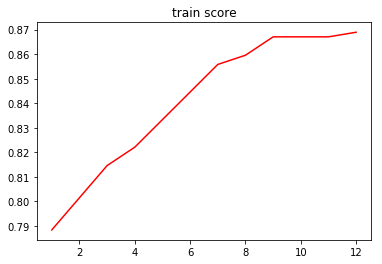

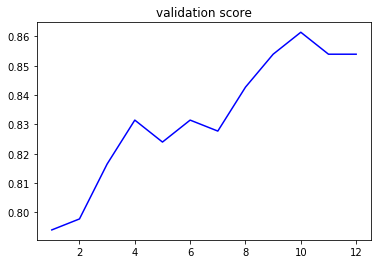

In [365]:
tree_data = np.column_stack((df2_mat[:,-1],df2_mat[:,2].astype(int),df2_mat[:,4].astype(int),df2_mat[:,5].astype(float),df2_mat[:,6].astype(int),df2_mat[:,7].astype(int),df2_mat[:,9].astype(float),df2_mat[:,1].astype(int)))
f_names = ["Embarked","richness","sex","age","sibs","parents","fare"]
# df2_mat[:,1] survived
#df2_mat[;,2] richness
# df2_mat[:,4] sex
# df2_mat[:,5] age
# df2_mat[:,6] sibs
# df2_mat[:,7] parents
# df2_mat[:,9] fare
tr1, va1, te1 = train_validate_test_split(tree_data)
# Fot this we have that a depth of 7 gives a maximum
tr1_X = tr1[:,:-1]
tr1_Y = tr1[:,-1].astype(int)
va1_X = va1[:,:-1]
va1_Y = va1[:,-1].astype(int)
trsc1 = []
vasc1 = []
x = range(1,13)
for i in x:
    clf2 = tree.DecisionTreeClassifier(max_depth=i,min_samples_leaf=5)
    clf2.fit(tr1_X,tr1_Y)
    trsc1.append(clf2.score(tr1_X,tr1_Y))
    vasc1.append(clf2.score(va1_X,va1_Y))
plt.figure()
plt.plot(x,trsc1,'red')
plt.title("train score")
plt.figure()
plt.plot(x,vasc1,'blue')
plt.title("validation score")

In [357]:
vasc1[2] #depth of 3

0.8202247191011236

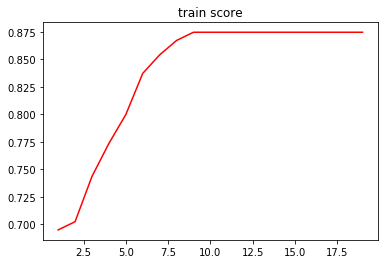

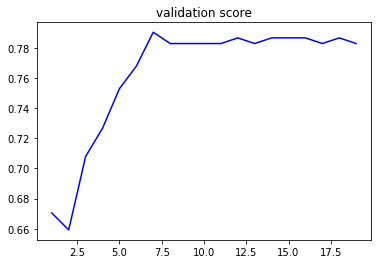

In [368]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=5)
tr1_X = tr1[:,:-1]
tr1_Y = tr1[:,-1].astype(int)
pca.fit(tr1_X)
tr1_X_trans = pca.transform(tr1_X)
va1_X = va1[:,:-1]
va1_X_trans = pca.transform(va1_X)
va1_Y = va1[:,-1].astype(int)
trsc2 = []
vasc2 = []
x = range(1,20)
for i in x:
    clf2 = tree.DecisionTreeClassifier(max_depth=i,min_samples_leaf=5)
    clf2.fit(tr1_X_trans,tr1_Y)
    trsc2.append(clf2.score(tr1_X_trans,tr1_Y))
    vasc2.append(clf2.score(va1_X_trans,va1_Y))
plt.figure()
plt.plot(x,trsc2,'red')
plt.title("train score")
plt.figure()
plt.plot(x,vasc2,'blue')
plt.title("validation score")

In [359]:
np_train_data[:,4]
# np_train_data[:,8] -same ticket same familty
# np_train_data[:,5] age
np_train_data[:,10] #cabin (nan) use in nearest neighbors
np_train_data[:,11] #embarked
#Enc10  = pp.LabelEncoder()
#Enc10.fit(np_train_data[:,11])
#cabin_t = Enc10.transform(np_train_data[:,11])
imp = Imputer(missing_values=-5, strategy='most_frequent', axis=0)
imp.fit(np.array(['S','Q','T',-5]).reshape(-1,1))
imp.transform(np.array(['S','Q','T',-5]).reshape(-1,1))

ValueError: could not convert string to float: 'S'

In [69]:
df1 = df
df1.apply(LabelEncoder().fit_transform)

TypeError: ("'>' not supported between instances of 'float' and 'str'", 'occurred at index Cabin')

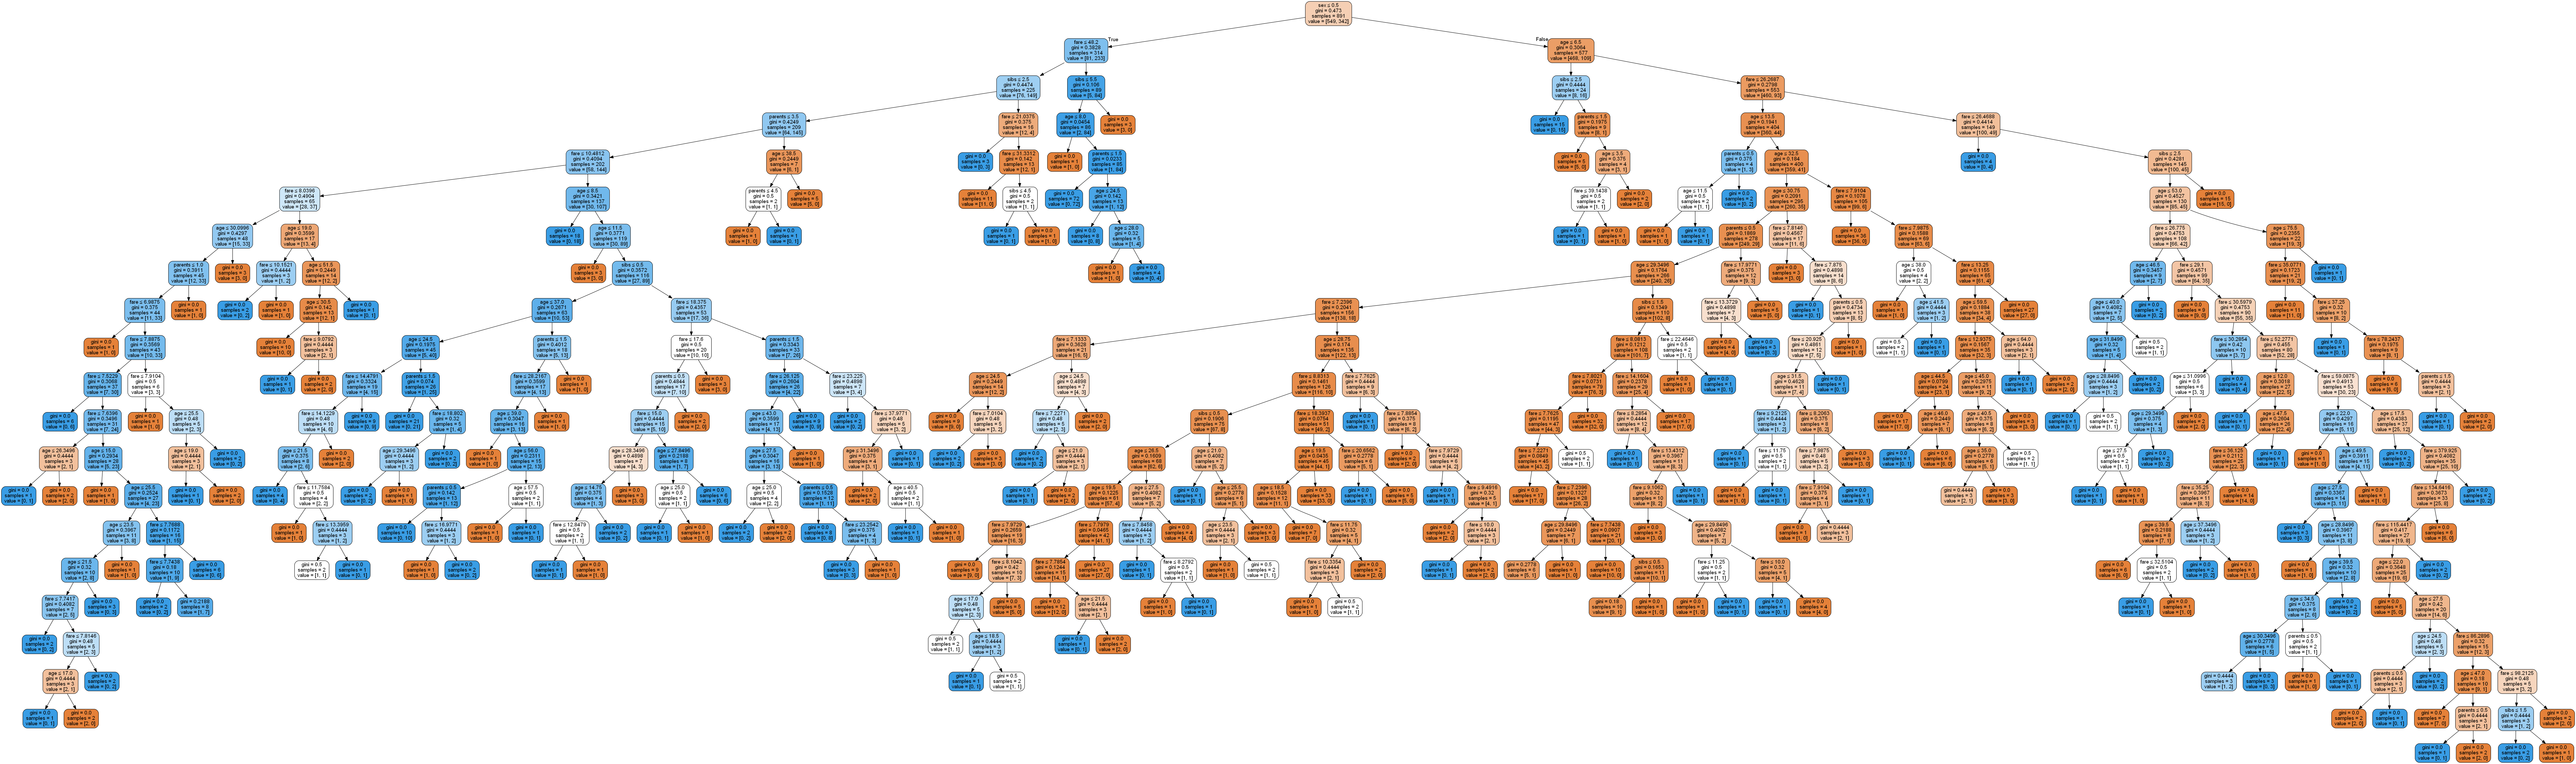

In [167]:
 from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=f_names,    
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

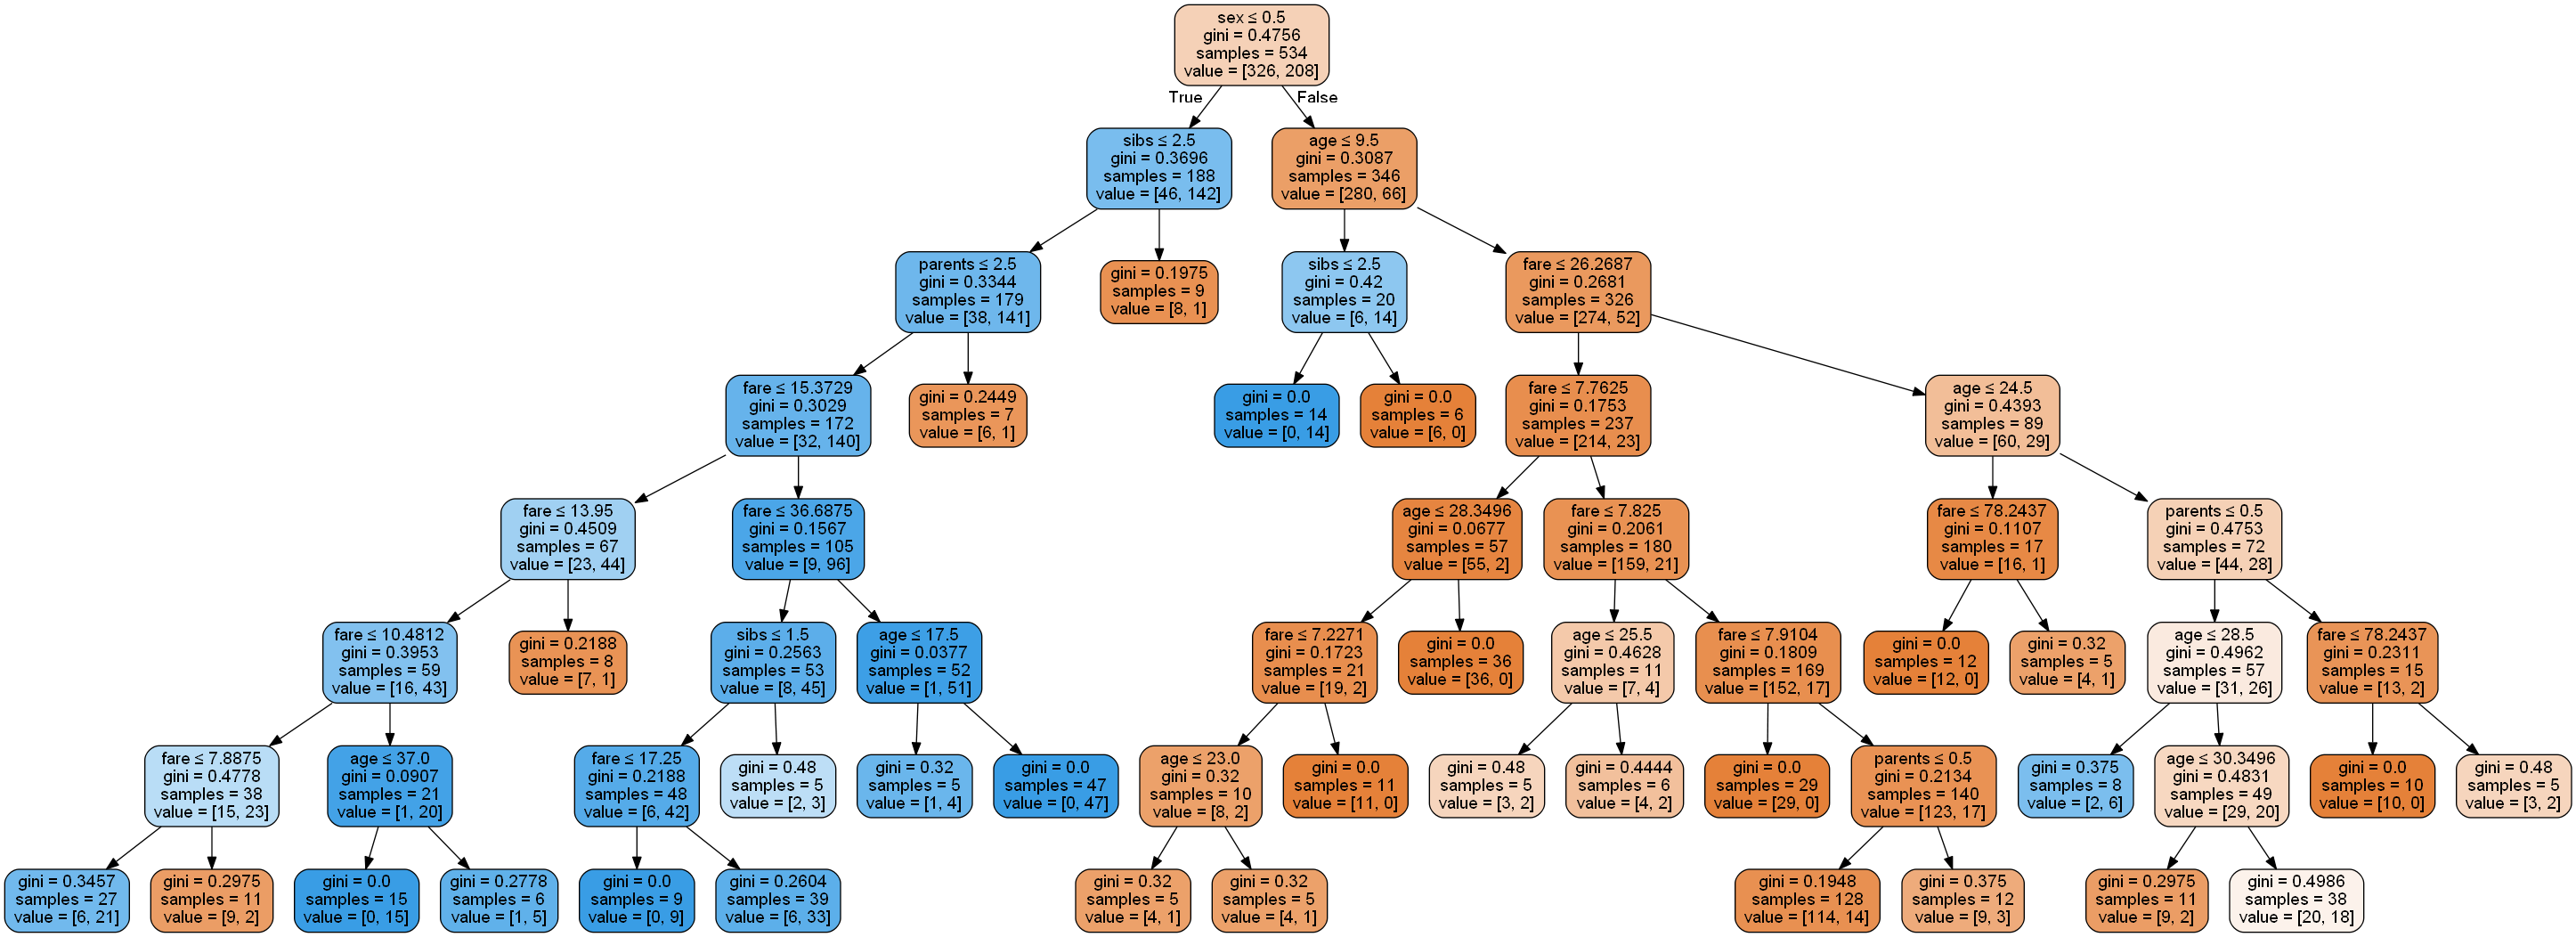

In [253]:
clf2 = tree.DecisionTreeClassifier(max_depth=7,min_samples_leaf=5)
clf2.fit(tr1_X,tr1_Y)
clf2.score(va1_X,va1_Y)
dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=f_names,    
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

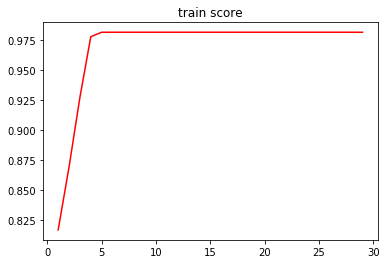

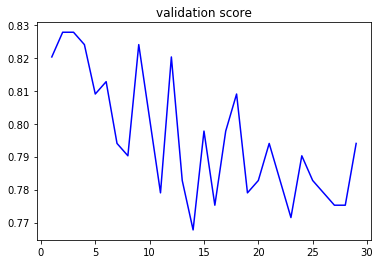

In [421]:
tr1, va1, te1 = train_validate_test_split(tree_data)
tr1_X = tr1[:,:-1]
tr1_Y = tr1[:,-1].astype(int)
va1_X = va1[:,:-1]
va1_Y = va1[:,-1].astype(int)
xx = range(1,30)
tr3_score = []
va3_score = []
for i in xx:
#from sklearn.ensemble import AdaBoostClassifier
    bdt = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=i),
                         algorithm="SAMME",
                         n_estimators=200)
    bdt.fit(tr1_X,tr1_Y)
    tr3_score.append(bdt.score(tr1_X,tr1_Y))
    va3_score.append(bdt.score(va1_X,va1_Y))
plt.figure()
plt.plot(xx,tr3_score,'red')
plt.title("train score")
plt.figure()
plt.plot(xx,va3_score,'blue')
plt.title("validation score")

In [398]:
va3_score[3]

0.84644194756554303

In [3]:
# Some tutorial help to visualize and understand data
df.describe(include=['O'])

Name   Sex Ticket Cabin Embarked
count                         891   891    891   204      889
unique                        891     2    681   147        3
top     Karlsson, Mr. Nils August  male   1601    G6        S
freq                            1   577      7     4      644

In [4]:
# survial chance are far greater for females
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

In [26]:
#extract second sentance in name
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pandas.crosstab(df['Title'], df['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

In [27]:
#combine rare names
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826

In [28]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

In [29]:
# Title from catogrial to ordinal
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S      1  
1      0          PC 17599  71.2833   C85        C      3  
2      0  STON/O2. 3101282   7.9250   NaN        S      2  
3      0            113803  53.1000  C123        S      3  
4      0            373450   8.0500   NaN        S      1

In [32]:
#we can now drop name
df=df.drop(['Name'],axis=1)

In [34]:
#For now, let us also drop cabin, ticket and PassengerId
df=df.drop(['PassengerId','Ticket','Cabin'],axis=1)

In [35]:
#converting Embarked and sex categoriel from catogoriel to ordinal


Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked  Title
0           0       3    male  22.0      1      0    7.2500        S      1
1           1       1  female  38.0      1      0   71.2833        C      3
2           1       3  female  26.0      0      0    7.9250        S      2
3           1       1  female  35.0      1      0   53.1000        S      3
4           0       3    male  35.0      0      0    8.0500        S      1
5           0       3    male   NaN      0      0    8.4583        Q      1
6           0       1    male  54.0      0      0   51.8625        S      1
7           0       3    male   2.0      3      1   21.0750        S      4
8           1       3  female  27.0      0      2   11.1333        S      3
9           1       2  female  14.0      1      0   30.0708        C      3
10          1       3  female   4.0      1      1   16.7000        S      2
11          1       1  female  58.0      0      0   26.5500        S      2
12          0       3    male  20.0      0      0    8.0500        S      1
13          0       3    male  39.0      1      5   31.2750        S      1
14          0       3  female  14.0      0      0    7.8542        S      2
15          1       2  female  55.0      0      0   16.0000        S      3
16          0       3    male   2.0      4      1   29.1250        Q      4
17          1       2    male   NaN      0      0   13.0000        S      1
18          0       3  female  31.0      1      0   18.0000        S      3
19          1       3  female   NaN      0      0    7.2250        C      3
20          0       2    male  35.0      0      0   26.0000        S      1
21          1       2    male  34.0      0      0   13.0000        S      1
22          1       3  female  15.0      0      0    8.0292        Q      2
23          1       1    male  28.0      0      0   35.5000        S      1
24          0       3  female   8.0      3      1   21.0750        S      2
25          1       3  female  38.0      1      5   31.3875        S      3
26          0       3    male   NaN      0      0    7.2250        C      1
27          0       1    male  19.0      3      2  263.0000        S      1
28          1       3  female   NaN      0      0    7.8792        Q      2
29          0       3    male   NaN      0      0    7.8958        S      1
..        ...     ...     ...   ...    ...    ...       ...      ...    ...
861         0       2    male  21.0      1      0   11.5000        S      1
862         1       1  female  48.0      0      0   25.9292        S      3
863         0       3  female   NaN      8      2   69.5500        S      2
864         0       2    male  24.0      0      0   13.0000        S      1
865         1       2  female  42.0      0      0   13.0000        S      3
866         1       2  female  27.0      1      0   13.8583        C      2
867         0       1    male  31.0      0      0   50.4958        S      1
868         0       3    male   NaN      0      0    9.5000        S      1
869         1       3    male   4.0      1      1   11.1333        S      4
870         0       3    male  26.0      0      0    7.8958        S      1
871         1       1  female  47.0      1      1   52.5542        S      3
872         0       1    male  33.0      0      0    5.0000        S      1
873         0       3    male  47.0      0      0    9.0000        S      1
874         1       2  female  28.0      1      0   24.0000        C      3
875         1       3  female  15.0      0      0    7.2250        C      2
876         0       3    male  20.0      0      0    9.8458        S      1
877         0       3    male  19.0      0      0    7.8958        S      1
878         0       3    male   NaN      0      0    7.8958        S      1
879         1       1  female  56.0      0      1   83.1583        C      3
880         1       2  female  25.0      0      1   26.0000        S      3
881         0       3    male  33.0      0      0    

In [36]:
plot_distribution( titanic , var = 'Age' , target = 'Survived' , row = 'Sex' )

NameError: name 'plot_distribution' is not defined